# Práctica 13: Caminatas Aleatorias
**Martínez Ostoa Néstor Iván (LCD32)**

Exploración del **problema de la ruina**

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
import time

## Ejercicio 1

Simula el **problema de la ruina** 5 veces con un capital inicial de $M=50$

In [19]:
def caminata(M, p):
    valores_caminata = [M]
    m = M
    while m > 0 and m < 2*M:
        n = random.randint(0, 1)
        if n <= p: m += 1
        else: m -= 1
        valores_caminata.append(m)
    return valores_caminata

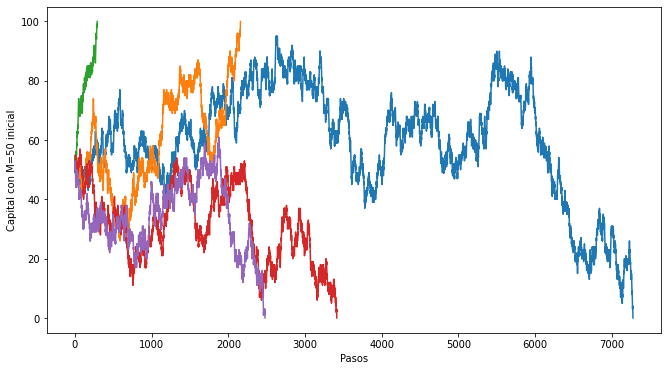

In [24]:
if __name__ == '__main__':
    plt.figure(figsize=(11,6))
    caminatas = []
    for _ in range(5):
        caminatas.append(caminata(50, 0.5))
    for i in range(5):
        plt.plot(caminatas[i])
    plt.xlabel("Pasos")
    plt.ylabel('Capital con M=50 inicial')
    plt.show()

## Ejercicio 2

Obten el promedio para $K \in \{100, 200, 400\}$ simulaciones con $M \in \{20, 40, 80, 150 \}$ para cuando se llegue a la ruina o a ganar $2M$. 

In [9]:
def caminata(M, p=0.5):
    valores_caminata = [M]
    m = M
    while m > 0 and m < 2*M:
        n = random.randint(0, 1)
        if n <= p: m += 1
        else: m -= 1
        valores_caminata.append(m)
    return len(valores_caminata)

def obtener_promedio(K):
    simulaciones = {}
    for k in range(K):
        p = mp.Pool()
        resultados = p.map(caminata, [20, 40, 80, 150])
        p.close()
        p.join()
        for i in range(4):
            if i in simulaciones:
                simulaciones[i].append(resultados[i])
            else:
                simulaciones[i] = [resultados[i]]
    print(f'K: {K}, M:  20, promedio: {np.mean(simulaciones[0])}')
    print(f'K: {K}, M:  40, promedio: {np.mean(simulaciones[1])}')
    print(f'K: {K}, M:  80, promedio: {np.mean(simulaciones[2])}')
    print(f'K: {K}, M: 150, promedio: {np.mean(simulaciones[3])}\n')

if __name__ == '__main__':
    t = time.time()
    p1 = mp.Process(target=obtener_promedio, args=(100,))
    p2 = mp.Process(target=obtener_promedio, args=(200,))
    p3 = mp.Process(target=obtener_promedio, args=(400,))
    p1.start()
    p2.start()
    p3.start()
    p1.join()
    p2.join()
    p3.join()
    print(time.time() - t)

K: 100, M:  20, promedio: 407.68
K: 100, M:  40, promedio: 1512.7
K: 100, M:  80, promedio: 6885.74
K: 100, M: 150, promedio: 25094.82

K: 200, M:  20, promedio: 438.87
K: 200, M:  40, promedio: 1587.86
K: 200, M:  80, promedio: 6161.82
K: 200, M: 150, promedio: 20429.79

K: 400, M:  20, promedio: 399.925
K: 400, M:  40, promedio: 1583.39
K: 400, M:  80, promedio: 6616.73
K: 400, M: 150, promedio: 22820.965

27.12483835220337


## Ejercicio 3

Obten el promedio para $K \in \{100, 200, 400\}$ simulaciones con $M \in \{20, 40, 80, 150 \}$ para cuando se llegue a la ruina únicamente.

In [84]:
def caminata(M, p=0.5):
    valores_caminata = [M]
    m = M
    while m > 0:
        n = random.randint(0, 1)
        if n <= p: m += 1
        else: m -= 1
        valores_caminata.append(m)
    return len(valores_caminata)

def obtener_promedio(K):
    simulaciones = {}
    for k in range(K):
        p = mp.Pool()
        resultados = p.map(caminata, [20, 40, 80, 150])
        p.close()
        p.join()
        for i in range(4):
            if i in simulaciones:
                simulaciones[i].append(resultados[i])
            else:
                simulaciones[i] = [resultados[i]]
    print(f'K: {K}, M:  20, promedio: {np.mean(simulaciones[0])}')
    print(f'K: {K}, M:  40, promedio: {np.mean(simulaciones[1])}')
    print(f'K: {K}, M:  80, promedio: {np.mean(simulaciones[2])}')
    print(f'K: {K}, M: 150, promedio: {np.mean(simulaciones[3])}\n')

if __name__ == '__main__':
    t = time.time()
    p1 = mp.Process(target=obtener_promedio, args=(10,))
    p1.start()
    p1.join()
    print(time.time() - t)

Process ForkPoolWorker-712:25:
Process ForkPoolWorker-712:22:
Process ForkPoolWorker-712:19:
Process ForkPoolWorker-712:17:
Process ForkPoolWorker-712:23:
Process ForkPoolWorker-712:24:
Process ForkPoolWorker-712:21:
Process ForkPoolWorker-712:18:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/nestor/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/nestor/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/nestor/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/nestor/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/nestor

KeyboardInterrupt: 